# Visualization of inversion - Complex data

In [56]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection
import matplotlib.pyplot as plt
import cPickle as pickle
import os
import matplotlib as mpb
import scipy as sp

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from fatiando import utils
from fatiando.gravmag import polyprism
from fatiando.gravmag.transform import reduce_to_pole
from fatiando.mesher import PolygonalPrism
from fatiando.vis import mpl, myv
from matplotlib import colors, ticker, cm
from IPython.display import Image as img
from matplotlib.mlab import normpdf
from scipy.stats import chi2_contingency

In [57]:
import sys
sys.path.insert(0, '../../code')

import mag_polyprism_functions as mfun

In [58]:
mypath = 'data/flightlines_grid_2100pts_100km2_-150m/tfa_inversion/multiple_inc65_dec-40_r500_int10_z0200_dz600_varz100_varint3_varinc5_vardec5/'

In [59]:
with open(mypath+'/inversion.pickle') as w:
        results = pickle.load(w)

In [60]:
with open('data/model.pickle') as w:
        model = pickle.load(w)

In [61]:
verts_true = mfun.plot_prisms(model['prisms'])

In [62]:
xp = results['x']
yp = results['y']
zp = results['z']

In [63]:
mean_list = []
std_list = []
misfit_list = []
for r in results['results']:
    std_list.append(np.std(r[-2]))
    misfit_list.append(np.std(r[-2])*100./np.std(results['observed_data']))
    mean_list.append(np.mean(r[-2]))

IndexError: list index out of range

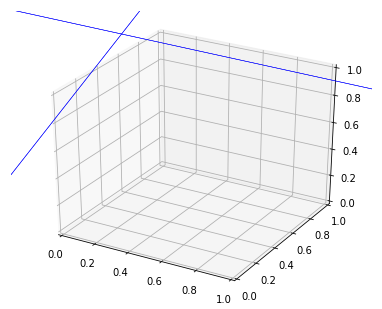

In [64]:
fig = plt.figure(figsize=(22,18))


for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(results_verts[i], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(5000, -150, 100)
    ax.set_xlabel('Y (m)')
    ax.set_ylabel('X (m)')
    ax.set_zlabel('Z (m)')
    ax.view_init(10, -10)
    ax.set_xticks(np.linspace(-5000, 5000, 5))
    ax.set_yticks(np.linspace(-5000, 5000, 5))
    ax.set_zticks(np.linspace(4850, -150, 6))

    #ax.tricontourf(xp, yp, results[i]['residual'],
    #                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'complex_3d_estimates_topxint_true.png', dpi=300)
plt.show()

In [65]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(m)', fontsize=18)
    plt.xlabel('$y$(m)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i]['residual'])
    std = np.std(results[i]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    #plt.title('Probability')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'complex_3d_residual_topxint_true.png', dpi=300)
plt.show()

KeyError: 4

<Figure size 1440x1296 with 0 Axes>

In [66]:
# norm for the residuals values
#norm=mpb.colors.Normalize(vmin=np.min(results[8]['residual']), vmax=abs(np.min(results[8]['residual'])))
nbins=30
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#vmin = np.min(results[8]['residual'])
#vmax = abs(np.min(results[8]['residual']))

vmin = 0
vmax = 0
for r in results['results']:
    print np.max(r[-2]), np.min(r[-2])
    if np.max(r[-2]) > vmax:
        vmax = np.max(r[-2])
    elif np.min(r[-2]) < vmin:
        vmin = np.min(r[-2])

16.680390947931386 -20.669564586402913
16.95282466966789 -20.447547167294246
17.1175510387816 -20.429404769437475
17.85291304836676 -20.255435799072593
16.946455873852983 -20.205236981722614
17.68981991321631 -20.261150246931415
16.5649258314036 -21.022791550516978
17.1125304444642 -20.407061729447065
16.13363112188638 -21.03382944920844
17.079316160816305 -20.487596310227524
16.414420664613132 -20.73760712300389
17.606377914721165 -20.310183308422125
17.21860689699649 -20.114467546142592
18.32286909987687 -20.388816441059276
17.443716331321866 -20.588880853219948
17.547566561906493 -20.422421522401287
19.070261804304224 -21.03710604687077
17.012520006527083 -20.261666833820676
16.826841916600017 -20.418249704163543


In [67]:
plot1 = [results['results'][11], results['results'][3],
        results['results'][7], results['results'][2],
        results['results'][0], results['results'][1],
        results['results'][12], results['results'][4],
        results['results'][8]]
std1 = [std_list[11], std_list[3],
        std_list[7], std_list[2],
        std_list[0], std_list[1],
        std_list[12], std_list[4],
        std_list[8]]
mean1 = [mean_list[11], mean_list[3],
        mean_list[7], mean_list[2],
        mean_list[0], mean_list[1],
        mean_list[12], mean_list[4],
        mean_list[8]]

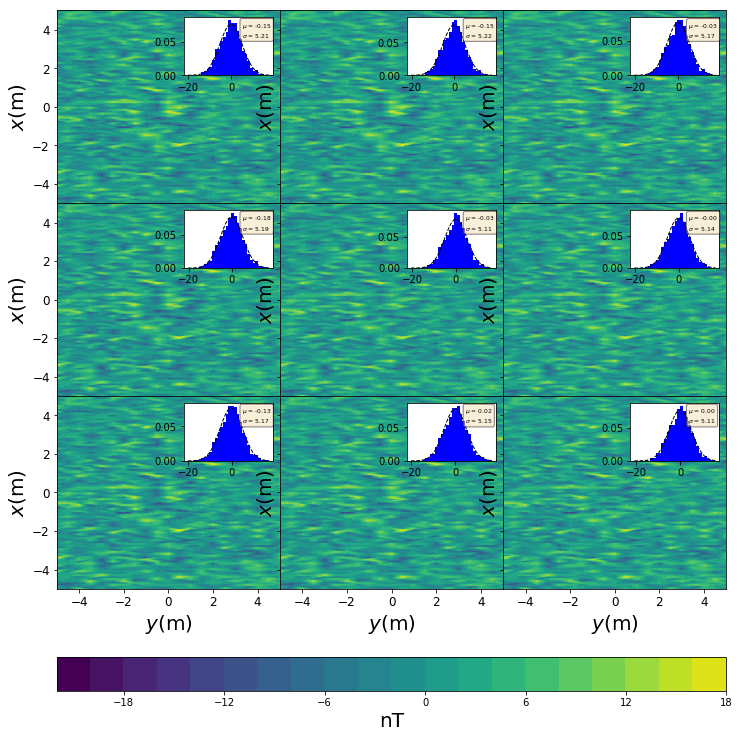

In [69]:
# plot
fig, axes = plt.subplots(3, 3, figsize=(12,14), sharey=True, sharex=True,
                         gridspec_kw={'hspace': 0, 'wspace': 0})
ax = [axes[0][0],axes[0][1],axes[0][2],
            axes[1][0],axes[1][1],axes[1][2],
            axes[2][0],axes[2][1],axes[2][2]]

for r, s, m, a in zip(plot1, std1, mean1, ax):
    cb = a.tricontourf(yp/1000., xp/1000., r[-2], 20, cmap='viridis', vmin=vmin, vmax=vmax)
    a.set_ylabel('$x$(m)', fontsize=20)
    a.set_xlabel('$y$(m)', fontsize=20)
    a.tick_params(labelsize=12)
    inset = inset_axes(a, width="40%", height="30%", loc=1, borderpad=0.7)
    n, bins, patches = plt.hist(r[-2],bins=nbins, normed=True, color='blue')
    gauss = sp.stats.norm.pdf(bins, m, s)
    inset.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    inset.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(m, s),
                transform=inset.transAxes, fontsize=6,
            va='top', ha='left', bbox=props)
cbar = plt.colorbar(cb, ax=axes, orientation="horizontal", pad=.09)
cbar.set_label('nT', fontsize=20)

In [44]:
axes.size

9

In [31]:
# norm for the residuals values
norm=mpb.colors.Normalize(vmin=np.min(results[8]['residual']), vmax=abs(np.min(results[8]['residual'])))
nbins=30
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
vmin = np.min(results[8]['residual'])
vmax = abs(np.min(results[8]['residual']))

# plot
fig, axes = plt.subplots(3, 3, figsize=(12,14), sharey=True, sharex=True,
                         gridspec_kw={'hspace': 0, 'wspace': 0})
((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = axes
axes2 = [axes[0][0],axes[0][1],axes[0][2],
            axes[1][0],axes[1][1],axes[1][2],
            axes[2][0],axes[2][1],axes[2][2]]
# first plot
ax1.tricontourf(yp/1000., xp/1000., results[0]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
ax1.set_ylabel('$x$(m)', fontsize=20)
ax1.tick_params(labelsize=12)
inset1 = inset_axes(ax1, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[0]['residual'])
std = np.std(results[0]['residual'])
n, bins, patches = plt.hist(results[0]['residual'],bins=nbins, normed=True, color='blue')
gauss = sp.stats.norm.pdf(bins, mean, std)
inset1.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset1.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset1.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
#inset1.tick_params(labelsize=14)
# second plot
ax2.tricontourf(yp/1000., xp/1000., results[1]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
inset2 = inset_axes(ax2, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[1]['residual'])
std = np.std(results[1]['residual'])
n, bins, patches = plt.hist(results[1]['residual'],bins=nbins, normed=True, color='blue')
gauss = sp.stats.norm.pdf(bins, mean, std)
inset2.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset2.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset2.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
# third plot
ax3.tricontourf(yp/1000., xp/1000., results[2]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
inset3 = inset_axes(ax3, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[2]['residual'])
std = np.std(results[2]['residual'])
n, bins, patches = plt.hist(results[2]['residual'],bins=nbins, normed=True, color='blue')
gauss = sp.stats.norm.pdf(bins, mean, std)
inset3.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset3.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset3.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
# fourth plot
ax4.tricontourf(yp/1000., xp/1000., results[3]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
ax4.set_ylabel('$x$(m)', fontsize=20)
ax4.tick_params(labelsize=12)
inset4 = inset_axes(ax4, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[3]['residual'])
std = np.std(results[3]['residual'])
n, bins, patches = plt.hist(results[3]['residual'],bins=nbins, normed=True, color='blue')
gauss = sp.stats.norm.pdf(bins, mean, std)
inset4.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset4.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset4.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
# fifth plot
ax5.tricontourf(yp/1000., xp/1000., results[4]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
inset5 = inset_axes(ax5, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[4]['residual'])
std = np.std(results[4]['residual'])
n, bins, patches = plt.hist(results[4]['residual'],bins=nbins, normed=True, color='blue')
gauss = sp.stats.norm.pdf(bins, mean, std)
inset5.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset5.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset5.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
# sixth plot
ax6.tricontourf(yp/1000., xp/1000., results[5]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
inset6 = inset_axes(ax6, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[5]['residual'])
std = np.std(results[5]['residual'])
n, bins, patches = plt.hist(results[5]['residual'],bins=nbins, normed=True, color='blue')
gauss = sp.stats.norm.pdf(bins, mean, std)
inset6.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset6.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset6.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
plt.savefig(mypath+'teste.png', dpi=300)
# seventh plot
ax7.tricontourf(yp/1000., xp/1000., results[6]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
ax7.set_ylabel('$x$(m)', fontsize=20)
ax7.set_xlabel('$y$(m)', fontsize=20)
ax7.tick_params(labelsize=12)
inset7 = inset_axes(ax7, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[6]['residual'])
std = np.std(results[6]['residual'])
n, bins, patches = plt.hist(results[6]['residual'],bins=nbins, normed=True, color='blue')
gauss = sp.stats.norm.pdf(bins, mean, std)
inset7.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset7.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset7.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
plt.savefig(mypath+'teste.png', dpi=300)
# eighth plot
ax8.tricontourf(yp/1000., xp/1000., results[7]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
ax8.set_xlabel('$y$(m)', fontsize=20)
ax8.tick_params(labelsize=12)
inset8 = inset_axes(ax8, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[7]['residual'])
std = np.std(results[7]['residual'])
n, bins, patches = plt.hist(results[7]['residual'],bins=nbins, normed=True, color='blue')
gauss = sp.stats.norm.pdf(bins, mean, std)
inset8.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset8.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset8.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)
# nineth plot
cb = ax9.tricontourf(yp/1000., xp/1000., results[8]['residual'], 20, cmap='viridis', vmin=vmin, vmax=vmax)
ax9.set_xlabel('$y$(m)', fontsize=20)
ax9.tick_params(labelsize=12)
inset9 = inset_axes(ax9, width="40%", height="30%", loc=1, borderpad=0.7)
mean = np.mean(results[8]['residual'])
std = np.std(results[8]['residual'])
n, bins, patches = plt.hist(results[8]['residual'],bins=nbins, normed=True, color='blue')
gauss = sp.stats.norm.pdf(bins, mean, std)
inset9.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
inset9.text(0.65, 0.95, "$\mu$ = {:.2f}\n$\sigma$ = {:.2f}".format(mean, std),
            transform=inset9.transAxes, fontsize=6,
        va='top', ha='left', bbox=props)

cbar = plt.colorbar(cb, ax=axes, orientation="horizontal", pad=.09)
cbar.set_label('nT', fontsize=20)

plt.savefig(mypath+'teste.png', dpi=300)
plt.show()

KeyError: 8

In [37]:
axes2

In [74]:
np.min(results[8]['residual'])

-628.2016158795639

In [ ]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(results_verts[i+9], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(5000, -150, 100)
    ax.set_xlabel('Y (m)')
    ax.set_ylabel('X (m)')
    ax.set_zlabel('Z (m)')
    ax.view_init(10, -10)
    ax.set_xticks(np.linspace(-5000, 5000, 5))
    ax.set_yticks(np.linspace(-5000, 5000, 5))
    ax.set_zticks(np.linspace(4850, -150, 6))

    #ax.tricontourf(xp, yp, results[i+9]['residual'],
    #                zdir='z', offset=-150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'complex_3d_estimates_topxdir_true.png', dpi=300)
plt.show()

In [ ]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i+9]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(m)', fontsize=18)
    plt.xlabel('$y$(m)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i+9]['residual'])
    std = np.std(results[i+9]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i+9]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'complex_3d_residual_topxdir_true.png', dpi=300)
plt.show()

In [ ]:
fig = plt.figure(figsize=(22,18))

norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))

for i in range(9):
    ax = fig.add_subplot(3,3,i+1, projection='3d')
    ax.add_collection3d(Poly3DCollection(verts_true, 
        alpha=0, facecolor='b', linewidths=0.5, edgecolors='b'))
    ax.add_collection3d(Poly3DCollection(results_verts[i+18], alpha=0.5, 
         facecolor='r', linewidths=0.5, edgecolors='k'))

    ax.set_xlim(-5000, 5000, 100)
    ax.set_ylim(-5000, 5000, 100)
    ax.set_zlim(5000, -150, 100)
    ax.set_xlabel('Y (m)')
    ax.set_ylabel('X (m)')
    ax.set_zlabel('Z (m)')
    ax.view_init(10, -10)
    ax.set_xticks(np.linspace(-5000, 5000, 5))
    ax.set_yticks(np.linspace(-5000, 5000, 5))
    ax.set_zticks(np.linspace(4850, -150, 6))

    ax.tricontourf(xp, yp, results[i+18]['residual'],
                    zdir='z', offset=-150, cmap='RdBu_r', norm=norm)
plt.savefig(mypath+'complex_3d_estimates_dirxint_true.png', dpi=300)
plt.show()

In [ ]:
# plot
fig = plt.figure(figsize=(20,18))
#plt.suptitle('Residual', fontsize=20)
norm=mpb.colors.Normalize(vmin=np.min(results[4]['residual']), vmax=np.min(results[4]['residual'])*(-1))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.tricontourf(yp, xp, results[i+18]['residual'], 20, cmap='RdBu_r', norm=norm).ax.tick_params(labelsize=12)
    plt.ylabel('$x$(m)', fontsize=18)
    plt.xlabel('$y$(m)', fontsize=18)
    plt.xlim(np.min(yp), np.max(yp))
    plt.ylim(np.min(xp), np.max(xp))
    clb = plt.colorbar(pad=0.025, aspect=40, shrink=1)
    clb.ax.tick_params(labelsize=13)
    clb.ax.set_title('nT')
    inset = inset_axes(ax, width="30%", height="20%", loc=1)
    mean = np.mean(results[i+18]['residual'])
    std = np.std(results[i+18]['residual'])
    nbins=30
    n, bins, patches = plt.hist(results[i+18]['residual'],bins=nbins, normed=True, color='blue')
    gauss = normpdf(bins, mean, std)
    plt.plot(bins, gauss, 'k--', linewidth=1., label='Gaussian')
    plt.xticks([])
    plt.yticks([])
plt.savefig(mypath+'complex_3d_residual_dirxint_true.png', dpi=300)
plt.show()